### Analysis of how the tendency for referees to award Fouls, Yellows and Reds differs between them, and how this individual tendency changes from season to season.
#### If a referee has a high/low ratio compared to average in any given season, will he/she maintain that inclination and can any future ratio be predicted?

#### Import requred libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  
%matplotlib inline

#### Read in data from top leagues since 2003

In [2]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])
df.head()

C:\Users\MikeD\AppData\Local\Temp\ipykernel_7744\271451034.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])


,Div,Date,HomeTeam,AwayTeam,FTHG,Referee,FTAG,HTHG,HTAG,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,TG,TST,TF,TC,TY,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,21/08/2021,Inter,Genoa,4.0,NaN,0.0,2.0,0.0,8.0,5.0,18.0,7.0,8.0,2.0,1.0,2.0,0.0,0.0,4.0,13.0,25.0,10.0,3.0,0.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
1,I1,21/08/2021,Verona,Sassuolo,2.0,NaN,3.0,0.0,1.0,4.0,8.0,11.0,12.0,7.0,4.0,3.0,2.0,1.0,0.0,5.0,12.0,23.0,11.0,5.0,1.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,I1,21/08/2021,Empoli,Lazio,1.0,NaN,3.0,1.0,3.0,5.0,5.0,13.0,10.0,5.0,3.0,2.0,1.0,0.0,0.0,4.0,10.0,23.0,8.0,3.0,0.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
3,I1,21/08/2021,Torino,Atalanta,1.0,NaN,2.0,0.0,1.0,8.0,2.0,17.0,13.0,5.0,1.0,2.0,2.0,0.0,0.0,3.0,10.0,30.0,6.0,4.0,0.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
4,I1,22/08/2021,Bologna,Salernitana,3.0,NaN,2.0,0.0,0.0,7.0,4.0,13.0,15.0,9.0,4.0,6.0,3.0,2.0,1.0,5.0,11.0,28.0,13.0,9.0,3.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09


In [3]:
# drop all rows where Referee columns is NaN and convert Referee column to type string
df = df.dropna(subset=['Referee'])
df['Referee'] = df["Referee"].astype("string")
df.reset_index(inplace=True)
df.head()

,index,Div,Date,HomeTeam,AwayTeam,FTHG,Referee,FTAG,HTHG,HTAG,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,TG,TST,TF,TC,TY,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,6044,I1,09/09/2006,Fiorentina,Inter,2.0,R. Rosetti,3.0,0.0,2.0,8.0,5.0,26.0,24.0,6.0,2.0,3.0,1.0,0.0,0.0,5.0,13.0,50.0,8.0,4.0,0.0,0.31,0.31,0.38,0.49,0.51,2.62,1.22,1.40,-0.18
1,6045,I1,09/09/2006,Roma,Livorno,2.0,D. Messina,0.0,1.0,0.0,7.0,3.0,19.0,17.0,8.0,6.0,2.0,2.0,0.0,0.0,2.0,10.0,36.0,14.0,4.0,0.0,0.63,0.25,0.12,0.51,0.49,2.71,2.05,0.66,1.39
2,6046,I1,10/09/2006,Atalanta,Ascoli,3.0,M. Bergonzi,1.0,3.0,0.0,6.0,2.0,24.0,10.0,4.0,4.0,1.0,2.0,0.0,0.0,4.0,8.0,34.0,8.0,3.0,0.0,0.50,0.30,0.20,0.43,0.57,2.40,1.56,0.84,0.72
3,6047,I1,10/09/2006,Cagliari,Catania,0.0,G. Rocchi,1.0,0.0,0.0,7.0,5.0,16.0,17.0,3.0,5.0,0.0,5.0,1.0,0.0,1.0,12.0,33.0,8.0,5.0,1.0,0.52,0.30,0.18,0.46,0.54,2.53,1.70,0.83,0.87
4,6048,I1,10/09/2006,Chievo,Siena,1.0,C. Brighi,2.0,1.0,0.0,2.0,6.0,14.0,26.0,6.0,7.0,4.0,1.0,1.0,0.0,3.0,8.0,40.0,13.0,5.0,1.0,0.52,0.30,0.18,0.47,0.53,2.56,1.72,0.84,0.88


In [4]:
# Isolate relevant columns
df = df[['Div','Date','HomeTeam','AwayTeam','Referee','TF','TY','TR']]
df.head()

,Div,Date,HomeTeam,AwayTeam,Referee,TF,TY,TR
0,I1,09/09/2006,Fiorentina,Inter,R. Rosetti,50.0,4.0,0.0
1,I1,09/09/2006,Roma,Livorno,D. Messina,36.0,4.0,0.0
2,I1,10/09/2006,Atalanta,Ascoli,M. Bergonzi,34.0,3.0,0.0
3,I1,10/09/2006,Cagliari,Catania,G. Rocchi,33.0,5.0,1.0
4,I1,10/09/2006,Chievo,Siena,C. Brighi,40.0,5.0,1.0


In [5]:
df['Referee'].unique()

<StringArray>
[    'R. Rosetti',     'D. Messina',    'M. Bergonzi',      'G. Rocchi',
      'C. Brighi',   'P. Mazzoleni',     'P. Bertini',     'N. Ayroldi',
        'G. Gava',   'N. Stefanini',
 ...
    'Lee Probert',    'Mark Warren',   'Kevin Friend',   'Kevin Wright',
  'Trevor Kettle',    'David Crick',   'Clive Penton',         'S Toml',
 'Paul Armstrong',   'E L Ilderton']
Length: 539, dtype: string

In [6]:
# change 'Date' to Year only so data can be more easily separated for analysis
df['Year'] = df.apply(lambda x: x['Date'][6:], axis = 1)
df = df.drop('Date', axis=1)


In [7]:
df.tail()

,Div,HomeTeam,AwayTeam,Referee,TF,TY,TR,Year
45161,E4,Macclesfield,Rochdale,K Hill,31.0,3.0,0.0,2003
45162,E4,Oxford,York,C Penton,27.0,0.0,0.0,2003
45163,E4,Rushden & D,Hartlepool,L Cable,27.0,3.0,0.0,2003
45164,E4,Shrewsbury,Scunthorpe,S Tomlin,22.0,2.0,0.0,2003
45165,E4,Swansea,Hull,S Mathieson,21.0,1.0,0.0,2003


In [8]:
df['Year'].unique()

array(['2006', '2007', '2005', '2021', '2022', '2020', '2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2011', '2012', '2010',
       '2009', '2008', '2004', '2003', '2002'], dtype=object)

### Create lists of years to compare and add columns with the average for those years

In [9]:

years = ['2002','2003','2004', '2005','2006', '2007', '2008','2009','2010','2011','2012','2013', '2014','2015','2016','2017','2018','2019','2020','2021']
# Create a new columns with default value 0
df['TF_Yr_Avg'] = 0
df['TY_Yr_Avg'] = 0
df['TR_Yr_Avg'] = 0

# Iterate over each year in years list
for year in years:
    # Filter the dataframe based on the 'Year' column
    filtered_df = df[df['Year'] == year]
    
    # Calculate the average of the 'TF/TY/TR' column
    avg_tf = round(filtered_df['TF'].mean(),2)
    avg_ty = round(filtered_df['TY'].mean(),2)
    avg_tr = round(filtered_df['TR'].mean(),2)
    
    # Update the 'TTF/TY/TR' column with the calculated average for the corresponding year
    df.loc[df['Year'] == year, 'TF_Yr_Avg'] = avg_tf
    df.loc[df['Year'] == year, 'TY_Yr_Avg'] = avg_ty
    df.loc[df['Year'] == year, 'TR_Yr_Avg'] = avg_tr

df.head()  

,Div,HomeTeam,AwayTeam,Referee,TF,TY,TR,Year,TF_Yr_Avg,TY_Yr_Avg,TR_Yr_Avg
0,I1,Fiorentina,Inter,R. Rosetti,50.0,4.0,0.0,2006,27.27,3.14,0.2
1,I1,Roma,Livorno,D. Messina,36.0,4.0,0.0,2006,27.27,3.14,0.2
2,I1,Atalanta,Ascoli,M. Bergonzi,34.0,3.0,0.0,2006,27.27,3.14,0.2
3,I1,Cagliari,Catania,G. Rocchi,33.0,5.0,1.0,2006,27.27,3.14,0.2
4,I1,Chievo,Siena,C. Brighi,40.0,5.0,1.0,2006,27.27,3.14,0.2


In [10]:
df.describe()

,TF,TY,TR,TF_Yr_Avg,TY_Yr_Avg,TR_Yr_Avg
count,45148.000000,45165.000000,45165.000000,45166.000000,45166.000000,45166.000000
mean,23.590724,3.098926,0.175246,22.910335,2.994292,0.171304
std,6.210021,1.880179,0.435757,4.484426,0.565323,0.037525
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.000000,0.000000,22.310000,3.020000,0.160000
50%,23.000000,3.000000,0.000000,23.060000,3.080000,0.180000
75%,27.000000,4.000000,0.000000,25.230000,3.220000,0.180000
max,90.000000,14.000000,5.000000,27.270000,3.350000,0.240000


# ___________________________________________________________________________________________

### Collate data of Referees with the most appearances

In [11]:
# Top n most used referees
n = 50
ref_list = df['Referee'].value_counts()[:n].index.tolist()
print(ref_list)

['M Dean', 'C Boyeson', 'M Atkinson', 'G Salisbury', 'K Stroud', 'K Friend', 'A Marriner', 'T Kettle', 'J Moss', 'A Woolmer', 'L Mason', 'D Whitestone', 'M Jones', 'A Taylor', 'G Ward', 'O Langford', 'M Oliver', 'E Ilderton', 'L Probert', 'D Drysdale', 'A Haines', 'D Webb', 'N Miller', 'M Clattenburg', 'S Hooper', 'P Dowd', "A D'Urso", 'C Sarginson', 'J Linington', 'S Mathieson', 'W Collum', 'D Deadman', 'N Swarbrick', 'G Eltringham', 'C Pawson', 'S Attwell', 'G Scott', 'H Webb', 'C Foy', 'P Tierney', 'P Walton', 'R East', 'K Hill', 'C Webster', 'I Williamson', 'M Haywood', 'T Robinson', 'M Halsey', 'D Coote', 'A Madley']


#### Assign seasons to compare, loop through each referee to separate out their data, add season averages and combine into a new collated DF

In [12]:
list_A = ['2004','2006','2008','2010','2012','2014','2016','2018','2020']
list_B = ['2005','2007','2009','2011','2013','2015','2017','2019','2021']
all_refs_df = pd.DataFrame(columns = ['Rf_TF_Mul_1','Rf_TY_Mul_1','Rf_TR_Mul_1','Rf_TF_Mul_2','Rf_TY_Mul_2','Rf_TR_Mul_2'])


for ref in ref_list:    
    df_ref = df[(df['Referee'] ==  ref)]
    
    #Split ref df into separate years for comparison

    df_ref_1 = df_ref.loc[(df_ref['Year'].isin(list_A))]
    df_ref_2 = df_ref.loc[(df_ref['Year'].isin(list_B))]
    
    # Create a new column 'TF_Avg' with default value 0
    df_ref_1['Rf_TF_Avg'] = 0
    df_ref_1['Rf_TY_Avg'] = 0
    df_ref_1['Rf_TR_Avg'] = 0

    # Iterate over each item in list_A
    for year in list_A:
        # Filter the dataframe based on the 'Year' column
        filtered_df = df_ref_1[df_ref_1['Year'] == year]
    
        # Calculate the average of the 'TF/TY/TR' column
        avg_tf = round(filtered_df['TF'].mean(),2)
        avg_ty = round(filtered_df['TY'].mean(),2)
        avg_tr = round(filtered_df['TR'].mean(),2)

        # Update the 'TTF/TY/TR' column with the calculated average for the corresponding year
        df_ref_1.loc[df_ref_1['Year'] == year, 'Rf_TF_Avg'] = avg_tf
        df_ref_1.loc[df_ref_1['Year'] == year, 'Rf_TY_Avg'] = avg_ty
        df_ref_1.loc[df_ref_1['Year'] == year, 'Rf_TR_Avg'] = avg_tr

    # Calculate specific ref multiples and select only required columns
    df_ref_1['Rf_TF_Mul_1'] = round(df_ref_1['TF_Yr_Avg'] / df_ref_1['Rf_TF_Avg'],2)
    df_ref_1['Rf_TY_Mul_1'] = round(df_ref_1['TY_Yr_Avg'] / df_ref_1['Rf_TY_Avg'],2)
    df_ref_1['Rf_TR_Mul_1'] = round(df_ref_1['TR_Yr_Avg'] / df_ref_1['Rf_TR_Avg'],2)
    df_ref_1 = df_ref_1[['Referee','Year','Rf_TF_Mul_1','Rf_TY_Mul_1','Rf_TR_Mul_1']]
    
    df_ref_1 = df_ref_1.drop_duplicates()
    df_ref_1 = df_ref_1.rename(columns={'Year':'Year_1'},inplace=False)
    df_ref_1 = df_ref_1.reset_index(drop=True)   
    
    ##-------------- SAME WITH DF2 ------------------
    
    # Create a new column 'TF_Avg' with default value 0
    df_ref_2['Rf_TF_Avg'] = 0
    df_ref_2['Rf_TY_Avg'] = 0
    df_ref_2['Rf_TR_Avg'] = 0

    # Iterate over each item in list_A
    for year in list_B:
        # Filter the dataframe based on the 'Year' column
        filtered_df = df_ref_2[df_ref_2['Year'] == year]
    
        # Calculate the average of the 'TF/TY/TR' column
        avg_tf = round(filtered_df['TF'].mean(),2)
        avg_ty = round(filtered_df['TY'].mean(),2)
        avg_tr = round(filtered_df['TR'].mean(),2)
    
        # Update the 'TTF/TY/TR' column with the calculated average for the corresponding year
        df_ref_2.loc[df_ref_2['Year'] == year, 'Rf_TF_Avg'] = avg_tf
        df_ref_2.loc[df_ref_2['Year'] == year, 'Rf_TY_Avg'] = avg_ty
        df_ref_2.loc[df_ref_2['Year'] == year, 'Rf_TR_Avg'] = avg_tr

    # Calculate specific ref multiples and select only required columns
    df_ref_2['Rf_TF_Mul_2'] = round(df_ref_2['TF_Yr_Avg'] / df_ref_2['Rf_TF_Avg'],2)
    df_ref_2['Rf_TY_Mul_2'] = round(df_ref_2['TY_Yr_Avg'] / df_ref_2['Rf_TY_Avg'],2)
    df_ref_2['Rf_TR_Mul_2'] = round(df_ref_2['TR_Yr_Avg'] / df_ref_2['Rf_TR_Avg'],2)
    df_ref_2 = df_ref_2[['Referee','Year','Rf_TF_Mul_2','Rf_TY_Mul_2','Rf_TR_Mul_2']]
    
    df_ref_2 = df_ref_2.drop_duplicates()
    df_ref_2 = df_ref_2.reset_index(drop=True)
    
    ##----------------------------------------------------
       
    data = [df_ref_1['Rf_TF_Mul_1'],df_ref_1['Rf_TY_Mul_1'],df_ref_1['Rf_TR_Mul_1'],df_ref_2['Rf_TF_Mul_2'],df_ref_2['Rf_TY_Mul_2'],df_ref_2['Rf_TR_Mul_2']]
    headers = ['Rf_TF_Mul_1','Rf_TY_Mul_1','Rf_TR_Mul_1','Rf_TF_Mul_2','Rf_TY_Mul_2','Rf_TR_Mul_2']
    ref_df = pd.concat(data, axis=1, keys=headers)
    ref_df = ref_df.reset_index(drop=True)
    
    
    all_refs_df = pd.concat([all_refs_df, ref_df], axis = 0, ignore_index=True)
    all_refs_df.replace([np.inf, -np.inf],np.nan, inplace=True)
    all_refs_df.dropna(axis = 0, inplace=True)
    

##### We now have a DF of collated ref data. Each row is a referee season comparison (1 with 2) and columns are the mutiples of TF (Total Fouls),TY (Total Yellows) and TR (Total Reds)

In [13]:
all_refs_df

,Rf_TF_Mul_1,Rf_TY_Mul_1,Rf_TR_Mul_1,Rf_TF_Mul_2,Rf_TY_Mul_2,Rf_TR_Mul_2
0,1.04,0.82,1.08,1.13,0.93,0.79
1,1.11,0.84,0.47,1.09,0.70,0.84
2,0.98,0.95,0.71,1.08,0.90,2.83
3,0.96,0.80,0.75,1.00,0.82,0.55
4,1.05,0.76,1.06,1.06,1.05,1.38
...,...,...,...,...,...,...
314,1.06,1.23,0.81,0.83,0.98,1.38
315,0.98,1.17,2.33,0.96,1.40,0.88
316,1.03,1.07,1.00,0.92,0.94,0.55
317,1.00,1.06,2.83,0.91,1.04,1.31


##### Plot histograms to visualize the spread of frequencies for each parameter

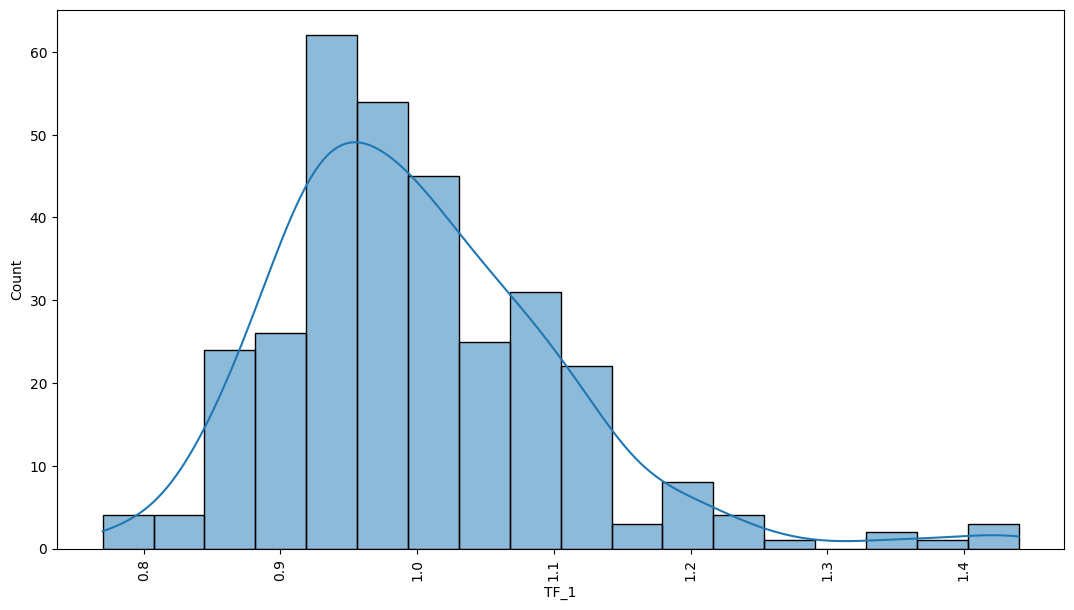

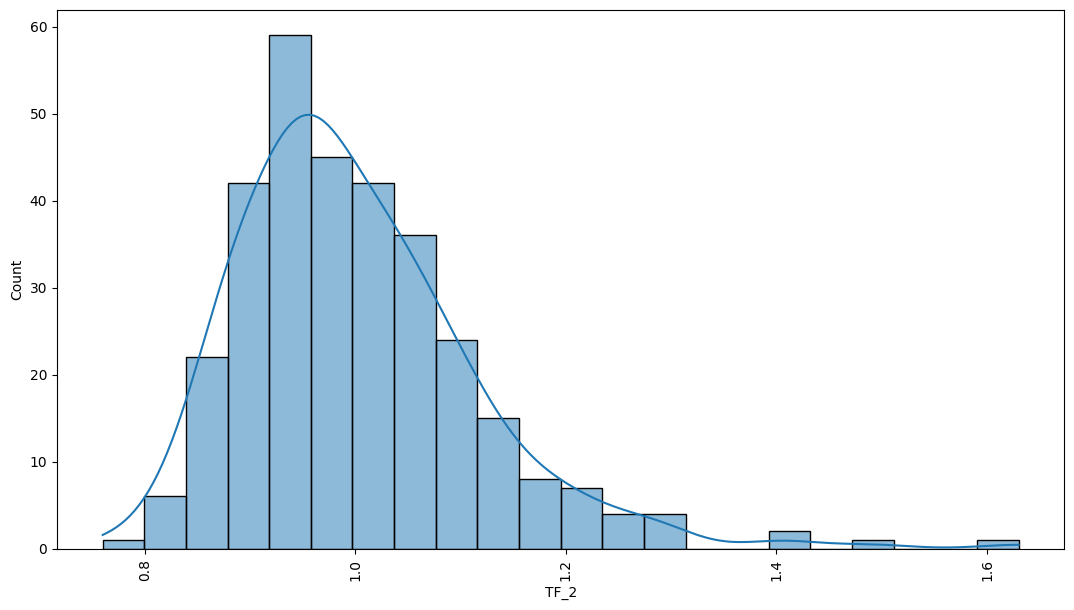

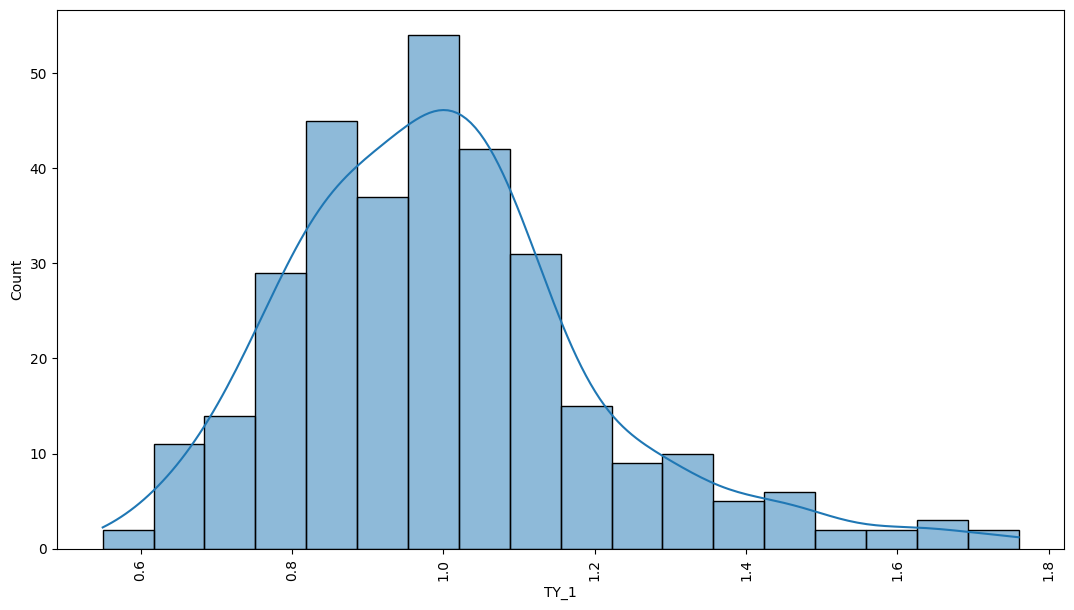

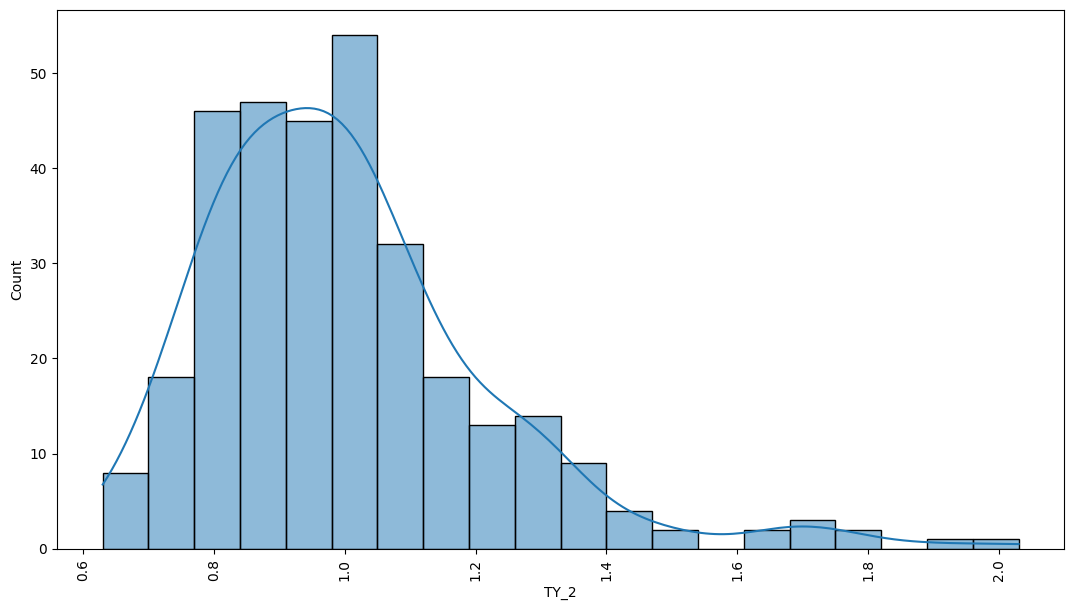

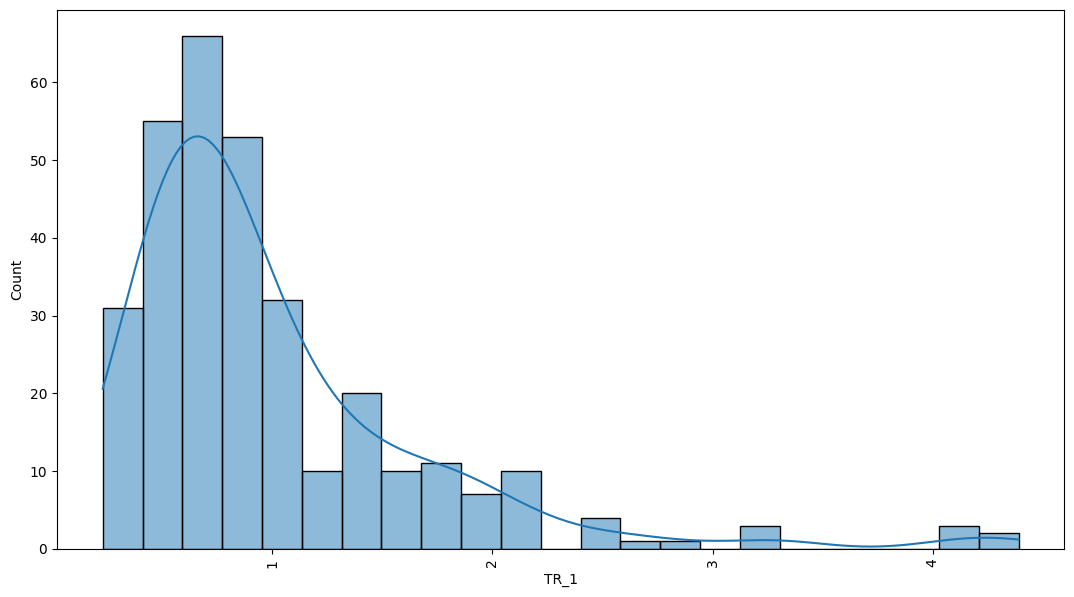

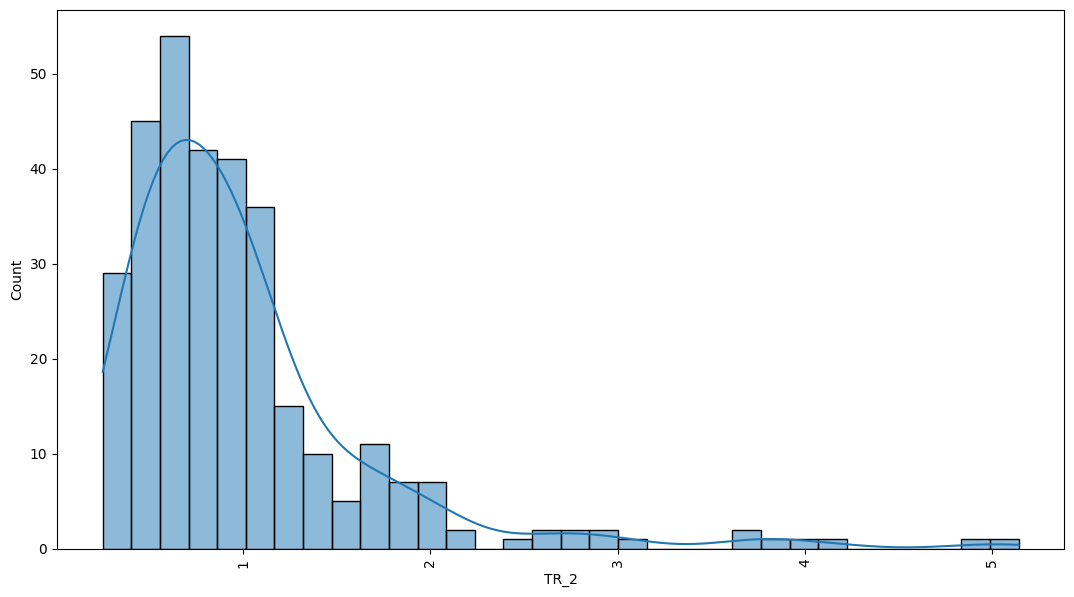

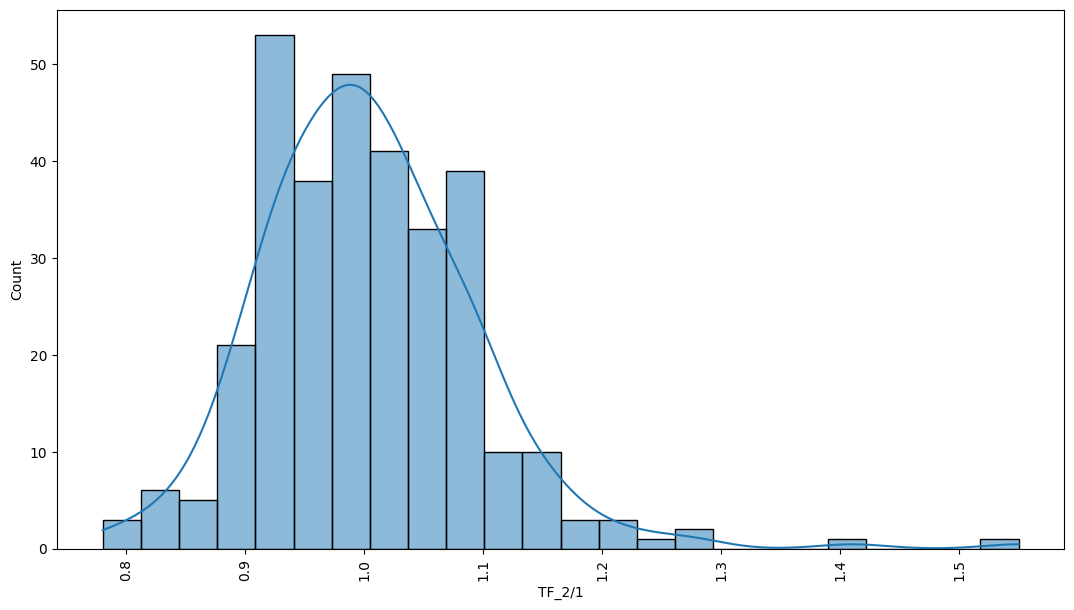

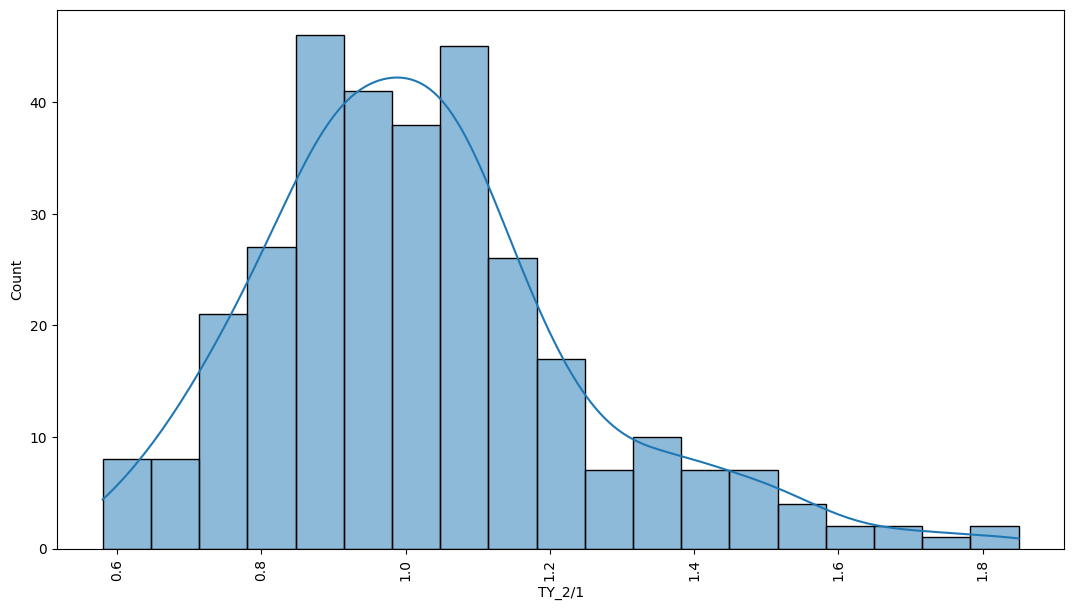

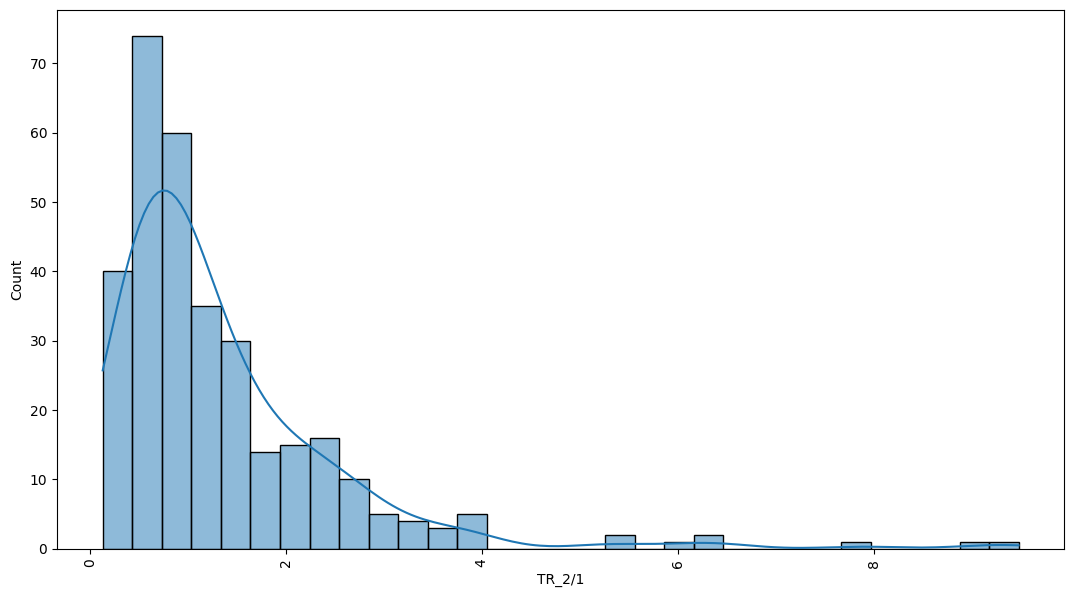

In [44]:
for i in all_refs_df.columns:
    plt.figure(figsize=(13,7))
    sns.histplot(data = all_refs_df[i], kde=True, multiple='stack')
    plt.xticks(rotation=90)
    plt.show()    

Check basic stats for the n most used refs

In [14]:
all_refs_df.describe()

,Rf_TF_Mul_1,Rf_TY_Mul_1,Rf_TR_Mul_1,Rf_TF_Mul_2,Rf_TY_Mul_2,Rf_TR_Mul_2
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1.031034,1.044828,1.366364,1.036991,1.043793,1.360721
std,0.108265,0.214778,0.948455,0.119229,0.228548,0.960427
min,0.790000,0.570000,0.310000,0.790000,0.660000,0.340000
25%,0.960000,0.900000,0.790000,0.950000,0.890000,0.790000
50%,1.020000,1.030000,1.060000,1.020000,1.010000,1.130000
75%,1.090000,1.140000,1.640000,1.100000,1.150000,1.520000
max,1.480000,1.840000,6.000000,1.690000,2.120000,7.000000


Averages above 1 suggest that the most used refs are also the more likely to blow their whistle. This sample needs to be standardized:

In [15]:
all_refs_df['TF_1'] = round(all_refs_df['Rf_TF_Mul_1'] * (1 / all_refs_df['Rf_TF_Mul_1'].mean()),2)
all_refs_df['TF_2'] = round(all_refs_df['Rf_TF_Mul_2'] * (1 / all_refs_df['Rf_TF_Mul_2'].mean()),2)
all_refs_df['TY_1'] = round(all_refs_df['Rf_TY_Mul_1'] * (1 / all_refs_df['Rf_TY_Mul_1'].mean()),2)
all_refs_df['TY_2'] = round(all_refs_df['Rf_TY_Mul_2'] * (1 / all_refs_df['Rf_TY_Mul_2'].mean()),2)
all_refs_df['TR_1'] = round(all_refs_df['Rf_TR_Mul_1'] * (1 / all_refs_df['Rf_TR_Mul_1'].mean()),2)
all_refs_df['TR_2'] = round(all_refs_df['Rf_TR_Mul_2'] * (1 / all_refs_df['Rf_TR_Mul_2'].mean()),2)


In [16]:
all_refs_df.describe()

,Rf_TF_Mul_1,Rf_TY_Mul_1,Rf_TR_Mul_1,Rf_TF_Mul_2,Rf_TY_Mul_2,Rf_TR_Mul_2,TF_1,TF_2,TY_1,TY_2,TR_1,TR_2
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1.031034,1.044828,1.366364,1.036991,1.043793,1.360721,1.000219,1.000094,0.999624,1.000188,1.000188,0.999749
std,0.108265,0.214778,0.948455,0.119229,0.228548,0.960427,0.106009,0.114316,0.205374,0.218889,0.693985,0.705737
min,0.790000,0.570000,0.310000,0.790000,0.660000,0.340000,0.770000,0.760000,0.550000,0.630000,0.230000,0.250000
25%,0.960000,0.900000,0.790000,0.950000,0.890000,0.790000,0.930000,0.920000,0.860000,0.850000,0.580000,0.580000
50%,1.020000,1.030000,1.060000,1.020000,1.010000,1.130000,0.990000,0.980000,0.990000,0.970000,0.780000,0.830000
75%,1.090000,1.140000,1.640000,1.100000,1.150000,1.520000,1.060000,1.060000,1.090000,1.100000,1.200000,1.115000
max,1.480000,1.840000,6.000000,1.690000,2.120000,7.000000,1.440000,1.630000,1.760000,2.030000,4.390000,5.140000


In [17]:
# Now columns are standardized with 1 being the average, we can drop the non standardized columns
all_refs_df.drop(['Rf_TF_Mul_1','Rf_TF_Mul_2','Rf_TY_Mul_1','Rf_TY_Mul_2','Rf_TR_Mul_1','Rf_TR_Mul_2'], axis=1, inplace=True)
all_refs_df

,TF_1,TF_2,TY_1,TY_2,TR_1,TR_2
0,1.01,1.09,0.78,0.89,0.79,0.58
1,1.08,1.05,0.80,0.67,0.34,0.62
2,0.95,1.04,0.91,0.86,0.52,2.08
3,0.93,0.96,0.77,0.79,0.55,0.40
4,1.02,1.02,0.73,1.01,0.78,1.01
...,...,...,...,...,...,...
314,1.03,0.80,1.18,0.94,0.59,1.01
315,0.95,0.93,1.12,1.34,1.71,0.65
316,1.00,0.89,1.02,0.90,0.73,0.40
317,0.97,0.88,1.01,1.00,2.07,0.96


##### Now create columns of the multiple of season 2 divided by season 1 showing how the referee tendency changes from one to the other

In [18]:
all_refs_df['TF_2/1'] = round(all_refs_df['TF_2'] / all_refs_df['TF_1'],2)
all_refs_df['TY_2/1'] = round(all_refs_df['TY_2'] / all_refs_df['TY_1'],2)
all_refs_df['TR_2/1'] = round(all_refs_df['TR_2'] / all_refs_df['TR_1'],2)


In [19]:
all_refs_df

,TF_1,TF_2,TY_1,TY_2,TR_1,TR_2,TF_2/1,TY_2/1,TR_2/1
0,1.01,1.09,0.78,0.89,0.79,0.58,1.08,1.14,0.73
1,1.08,1.05,0.80,0.67,0.34,0.62,0.97,0.84,1.82
2,0.95,1.04,0.91,0.86,0.52,2.08,1.09,0.95,4.00
3,0.93,0.96,0.77,0.79,0.55,0.40,1.03,1.03,0.73
4,1.02,1.02,0.73,1.01,0.78,1.01,1.00,1.38,1.29
...,...,...,...,...,...,...,...,...,...
314,1.03,0.80,1.18,0.94,0.59,1.01,0.78,0.80,1.71
315,0.95,0.93,1.12,1.34,1.71,0.65,0.98,1.20,0.38
316,1.00,0.89,1.02,0.90,0.73,0.40,0.89,0.88,0.55
317,0.97,0.88,1.01,1.00,2.07,0.96,0.91,0.99,0.46


In [20]:
print(all_refs_df['TF_2/1'].mean())
print(all_refs_df['TY_2/1'].mean())
print(all_refs_df['TR_2/1'].mean())

1.0030407523510974
1.022319749216301
1.34846394984326


 Means don't indicate any obvious reversion to mean, ie it might be assumed a lower ratio season would follow a high ratio season and vice versa

In [21]:
# Is there a correlation between the fouls comparison years?
all_refs_df.corr()['TF_1']['TF_2']


0.6597246264347281

In [22]:
# Is there a correlation between the yellows comparison years?
all_refs_df.corr()['TY_1']['TY_2']

0.417925404808722

In [23]:
# Is there a correlation between the reds comparison years?
all_refs_df.corr()['TR_1']['TR_2']

0.04870273064994941

Moderate positive correlation shown for Fouls and low positive correlation for Yellows. Referees are consistently higher or lower from season to season. The Total Reds 
correlation is very low , possibly less data from which to calculate reliable correlations. 

# ________________________________________________________________

#### Further analysis of the Fouls and Yellows correlations and using the data to develop a regression model to provide a formula to quantify and predict a referee's influence on the number of fouls and yellows in a future match.

# __________________________________________________________________

### Referee Fouls Analysis

##### Create a Dataframe just for Fouls season comparison and analyse the relationship. Create a regression model to predict expected referee ratio in season two, given season one ratio.

In [24]:
df_TF = all_refs_df[['TF_1','TF_2']]
df_TF

,TF_1,TF_2
0,1.01,1.09
1,1.08,1.05
2,0.95,1.04
3,0.93,0.96
4,1.02,1.02
...,...,...
314,1.03,0.80
315,0.95,0.93
316,1.00,0.89
317,0.97,0.88


#### Create plot of the relationship

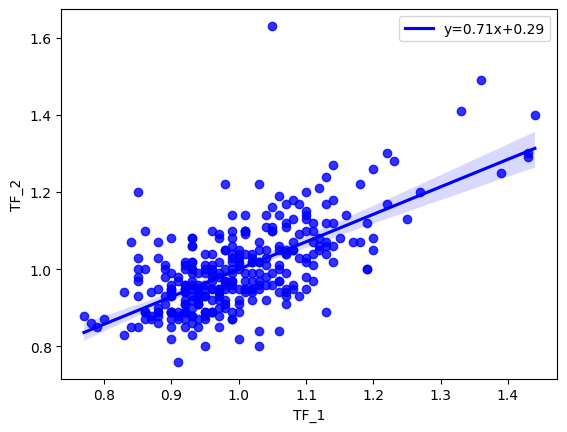

In [25]:
# Now lets plot the % split vs Sup for all matches
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

slope, intercept, r_value, p_value, std_err = stats.linregress(df_TF['TF_1'],df_TF['TF_2'])

# use line_kws to set line label for legend
ax = sns.regplot(x="TF_1", y="TF_2", data=df_TF, color='b', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [26]:
lm = LinearRegression()
X = df_TF[['TF_1']]
Y = df_TF[['TF_2']]
lm.fit(X,Y)
print('The R-Square is: ', lm.score(X,Y))
print('Intercept is: ',lm.intercept_)
print('Co-efficient is ',lm.coef_)

The R-Square is:  0.43523658272444365
Intercept is:  [0.28851718]
Co-efficient is  [[0.71142075]]


#### Is the relationship linear or non linear? Not obvious from the plot. Check with a residual plot

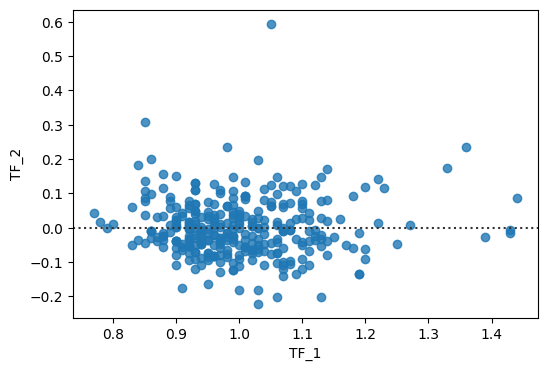

In [27]:
# residual plot to check if linear
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.residplot(x=df_TF['TF_1'],y=df_TF['TF_2'])
plt.show()

Doesnt look particularly evenly distributed at the extremes suggesting a non-linear relationship may be more applicable.

In [28]:
# the distribution of data points around the regression line signifies a curved relationship is likely present
# Lets define a function to show the polynomial relationship through which we can parse the independent and target variables
# TF_2 (total fouls multiple season 2) is the target variable, TF_1 is the independent

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0.7,1.4)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Polynomial fit for Fouls')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('TF_2')
    
    plt.show()
    plt.close()
    
x = df_TF['TF_1']
y = df_TF['TF_2']  

f = np.polyfit(x,y,4) # 4d Polynomial decided on by trial and error of the resulting R^2
p = np.poly1d(f)
print(p)

        4         3         2
-5.955 x + 24.11 x - 35.16 x + 22.45 x - 4.457


The above ML formula is therefore the best for predicting TF_2 given TF_1. Lets see how this trend fits the data:

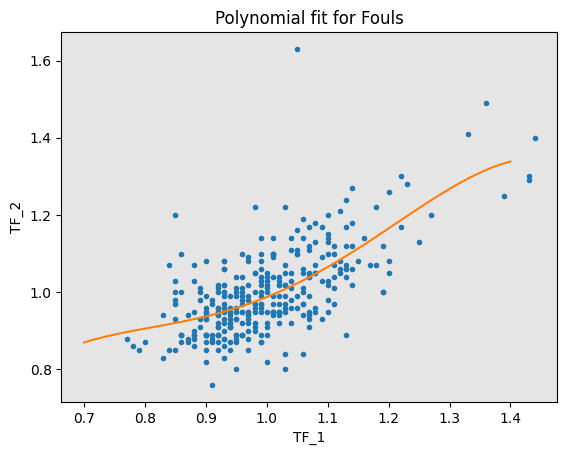

In [29]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'TF_1')

Looks a nice fit. Lets now observe R^2 and standard error metrics:

In [30]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.4532023712773229


Polynomial (4 degree) gives an R^2 of 0.453, better than linear (0.435) and will handle extremes better.

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_TF['TF_2'],p(x))

0.007123276999979922

### Conclusion
- Data shows a moderate positive correlation for referees to give a higher or lower number of fouls compared to the average in consecutive seasons. If a referee has a tendency to blow for fewer fouls than average, this will likely be continued in the following season, and vice versa.
- The expected ratio of fouls given by a referee in any given season can be expressed in the below formula where x is the ratio for the previous season.

In [32]:
print('Formula for referee fouls ratio: ', "")
print('')
print(p)

Formula for referee fouls ratio:  

        4         3         2
-5.955 x + 24.11 x - 35.16 x + 22.45 x - 4.457


# ________________________________________________________________________

### Referee Yellows Analysis

##### Create DF just of Yellows and explore relationship

In [33]:
df_TY = all_refs_df[['TY_1','TY_2']]
df_TY

,TY_1,TY_2
0,0.78,0.89
1,0.80,0.67
2,0.91,0.86
3,0.77,0.79
4,0.73,1.01
...,...,...
314,1.18,0.94
315,1.12,1.34
316,1.02,0.90
317,1.01,1.00


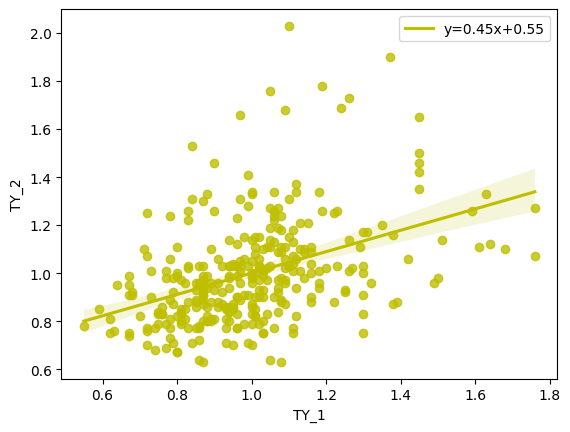

In [34]:
# Now lets plot the % split vs Sup for all matches
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

slope, intercept, r_value, p_value, std_err = stats.linregress(df_TY['TY_1'],df_TY['TY_2'])

# use line_kws to set line label for legend
ax = sns.regplot(x="TY_1", y="TY_2", data=df_TY, color='y', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [35]:
lm = LinearRegression()
X = df_TY[['TY_1']]
y = df_TY[['TY_2']]
lm.fit(X,y)
print('The R-Square is: ', lm.score(X,y))
print('Intercept is: ',lm.intercept_)
print('Co-efficient is ',lm.coef_)

The R-Square is:  0.17466164398453388
Intercept is:  [0.5549272]
Co-efficient is  [[0.44542845]]


#### Is the relationship linear or non linear? Not obvious from the plot. Check with a residual plot

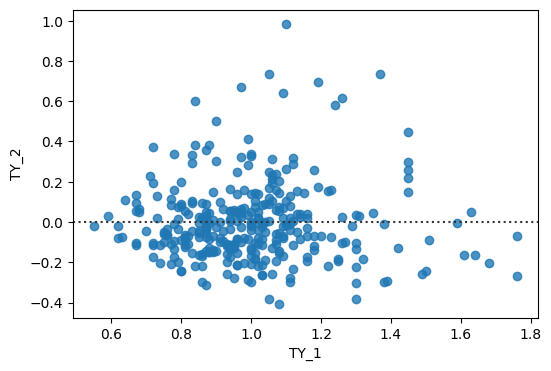

In [36]:
# residual plot to check if linear
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.residplot(x=df_TY['TY_1'],y=df_TY['TY_2'])
plt.show()

Data points do not look  evenly distributed around the mean suggesting a non-linear relationship may be a better fit.

In [37]:
# the distribution of data points around the regression line signifies a curved relationship may be better
# Lets define a function to show the polynomial relationship through which we can parse the independent and target variables
# TY_2 (total yellows multiple season 2) is the target variable, TY_1 is the independent

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0.7,1.4)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Polynomial fit for TY')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('TY_2')
    
    plt.show()
    plt.close()
    
X = df_TY['TY_1']
y = df_TY['TY_2']  

f = np.polyfit(X,y,5) # 5d Polynomial decided on by trial and error of the resulting R^2
p = np.poly1d(f)
print(p)

      5         4         3         2
1.33 x - 7.543 x + 15.79 x - 15.18 x + 7.1 x - 0.4971


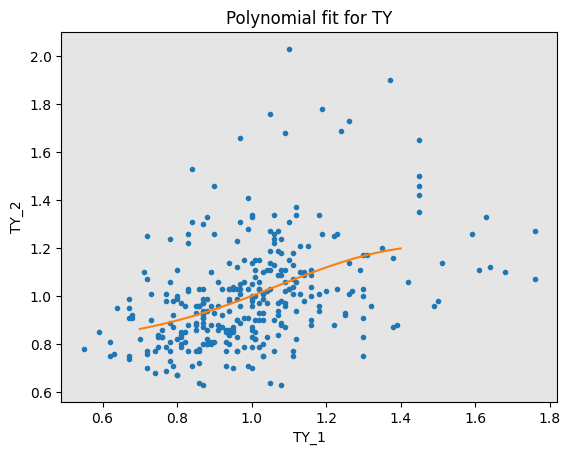

In [38]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,X,y,'TY_1')

In [39]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.18608717951157105


Slightly better R2 score than linear model

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_TY['TY_2'],p(x))

0.044281583736812354

### Conclusion
- Data shows a low positive correlation for referees to give a higher or lower number of fouls compared to the average in consecutive seasons. If a referee has a tendency to blow for fewer yellows than average, this will be continued in the following season, and vice versa. The data suggests that this tendency is not as strong as it is for fouls.
- The expected ratio of yellow cards shown by a referee in any given season can be expressed in the below formula where x is the ratio for the previous season.

In [41]:
print('Formula for referee Yellows ratio: ', "")
print('')
print(p)

Formula for referee Yellows ratio:  

      5         4         3         2
1.33 x - 7.543 x + 15.79 x - 15.18 x + 7.1 x - 0.4971


# ___________________________________________________________________________